## Title: Contraceptive Method Choice
2. Sources:
(a) Origin: This dataset is a subset of the 1987 National Indonesia Contraceptive Prevalence Survey

(b) Creator: Tjen-Sien Lim (limt@stat.wisc.edu)

(c) Donor: Tjen-Sien Lim (limt@stat.wisc.edu)

(d) Date: June 7, 1997

3. Past Usage:
Lim, T.-S., Loh, W.-Y. & Shih, Y.-S. (1999). A Comparison of Prediction Accuracy, Complexity, and Training Time of Thirty-three Old and New Classification Algorithms. Machine Learning. Forthcoming. (ftp://ftp.stat.wisc.edu/pub/loh/treeprogs/quest1.7/mach1317.pdf or (http://www.stat.wisc.edu/~limt/mach1317.pdf)

4. Relevant Information:
This dataset is a subset of the 1987 National Indonesia Contraceptive Prevalence Survey. The samples are married women who were either not pregnant or do not know if they were at the time of interview. The problem is to predict the current contraceptive method choice (no use, long-term methods, or short-term methods) of a woman based on her demographic and socio-economic characteristics.

5. Number of Instances: 1473
6. Number of Attributes: 10 (including the class attribute)
7. Attribute Information:
Wife's age (numerical)

Wife's education (categorical) 1=low, 2, 3, 4=high

Husband's education (categorical) 1=low, 2, 3, 4=high

Number of children ever born (numerical)

Wife's religion (binary) 0=Non-Islam, 1=Islam

Wife's now working? (binary) 0=Yes, 1=No

Husband's occupation (categorical) 1, 2, 3, 4

Standard-of-living index (categorical) 1=low, 2, 3, 4=high

Media exposure (binary) 0=Good, 1=Not good

Contraceptive method used (class attribute) 1=No-use ,2=Long-term,3=Short-term

In [98]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import seaborn as sns
pd.set_option('display.max_columns', 50)
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = [8,10]
plt.style.use("fivethirtyeight")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV

In [50]:
df = pd.read_csv("IndonesiaContraception.csv", header=None, names = ['age_wife', 'education_wife', 'education_husband', 'number_of_children', 'islamic', 'wife_working', 'husband_occupation', 'std_of_living', 'media', 'target'])

In [57]:
df.describe()

,age_wife,education_wife,education_husband,number_of_children,islamic,wife_working,husband_occupation,std_of_living,media,target
count,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000
mean,32.538357,2.958588,3.429735,3.261371,0.850645,0.749491,2.137814,3.133741,0.073999,0.572980
std,8.227245,1.014994,0.816349,2.358549,0.356559,0.433453,0.864857,0.976161,0.261858,0.494813
min,16.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,26.000000,2.000000,3.000000,1.000000,1.000000,0.000000,1.000000,3.000000,0.000000,0.000000
50%,32.000000,3.000000,4.000000,3.000000,1.000000,1.000000,2.000000,3.000000,0.000000,1.000000
75%,39.000000,4.000000,4.000000,4.000000,1.000000,1.000000,3.000000,4.000000,0.000000,1.000000
max,49.000000,4.000000,4.000000,16.000000,1.000000,1.000000,4.000000,4.000000,1.000000,1.000000


In [55]:
df['target'][df['target']==1] = 0
df['target'][df['target']!=0] = 1

In [56]:
df['target'].mean()

0.572980312287848

In [34]:
# Create a function that returns the dataframe with accounts and targets for each category
# Use for visualizing low probability events 
def freq_plots(column_name, df):
    categories, targets, totals, ratio = [], [], [], []
    bin_min = int(df[column_name].min())
    bin_max = int(df[column_name].max()+1)
    step = 1
    if bin_max-bin_min>100:
        step = ((bin_max-bin_min)//100)+1
        
    for category in range(bin_min, bin_max, step):
        categories.append(category)
        totals.append(df[column_name][(df[column_name]>=category) & 
                                      (df[column_name]<category+step)].count())
        targets.append(df["target"][(df[column_name]>=category) & 
                                          (df[column_name]<category+step)].sum())
        ratio.append(round(targets[-1]/totals[-1], 3))
    count_df = pd.DataFrame(list(zip(categories, totals, targets, ratio)), 
                            columns=[column_name, "total", "target", "ratio"])
    fig, ax = plt.subplots(2, 1, sharex='col', sharey='row')
    ax[0].bar(categories, np.subtract(totals, targets), width=0.8*step, label='Misses', bottom=targets)
    ax[0].bar(categories, targets, width=0.8*step, label='Hits')
    ax[0].set_ylabel("Hits by {}".format(column_name))
    ax[0].set_xlabel(column_name.title())
    ax[0].legend(loc="best")
    ax[1].bar(categories, ratio, width=0.8*step, label='ratio', color="orange")
    ax[1].set_ylabel("Hits/Total")
    ax[1].set_xlabel(column_name.title())
    ax[1].legend(loc="best")
    return count_df, fig, ax

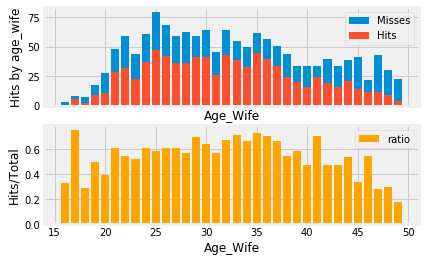

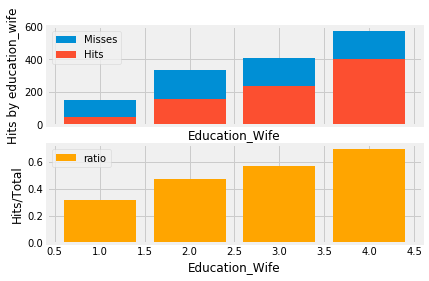

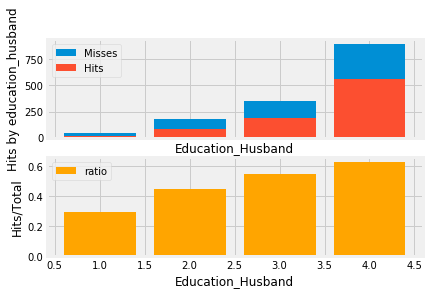

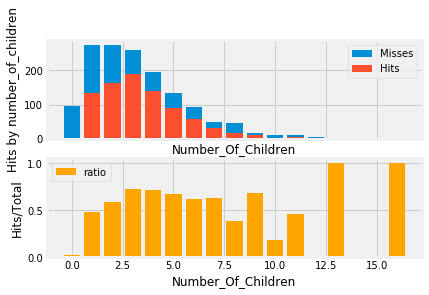

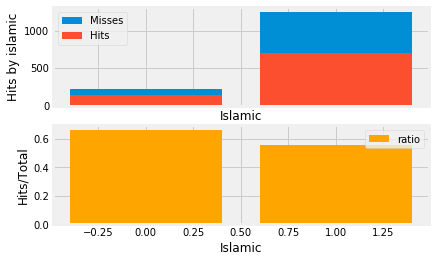

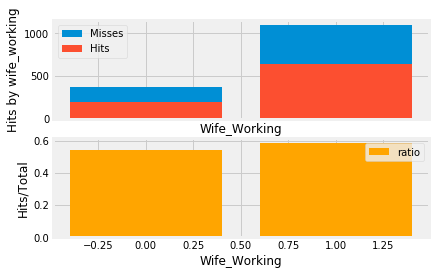

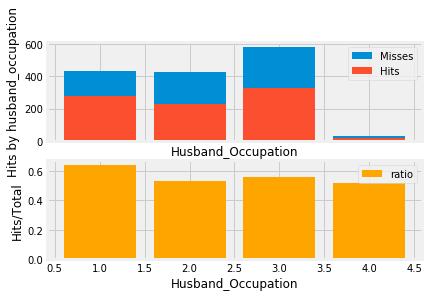

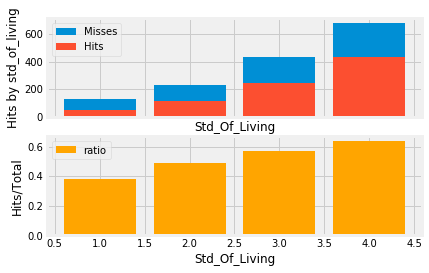

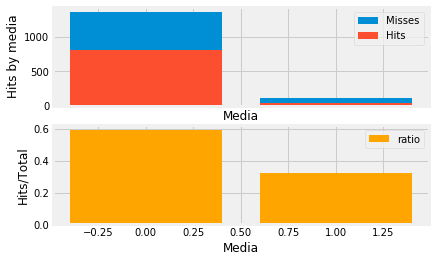

In [35]:
for column_name in df.columns[:-1]:
    freq_plots(column_name, df);

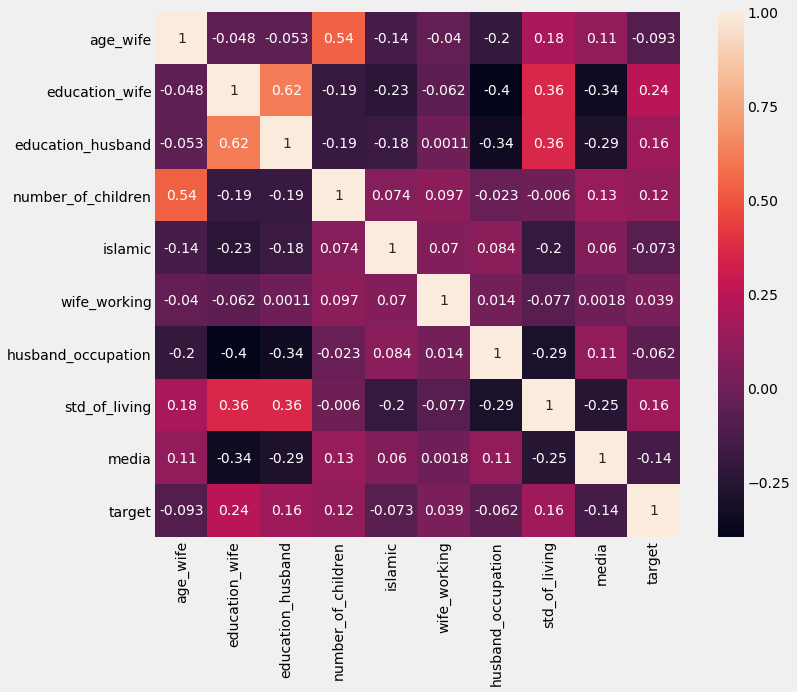

In [64]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, square=True, annot=True)

In [58]:
feat_df = df.copy()

## Baseline Modeling

In [59]:
# Train Test Split
X = feat_df.drop('target', axis = 1) 

# Create target variable
y = feat_df['target']

# Create a list of the features being used in the 
feature_cols = X.columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=23)

In [60]:
# Logistic regression
# scaler = StandardScaler()  
# scaler.fit(X_train)

# # X_train = scaler.transform(X_train)
# # X_test = scaler.transform(X_test)

lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)
y_pred_test = lr_clf.predict(X_test)

# checking accuracy
print('Test Accuracy score: ', accuracy_score(y_test, y_pred_test))

# checking accuracy
print('Test F1 score: ', f1_score(y_test, y_pred_test))

Test Accuracy score:  0.6747967479674797
Test F1 score:  0.7345132743362832


In [61]:
#Set up logistic regression with cross-validation using liblinear.
#Cs sets the inverse of the regularization strength, which will be optimized
#through cross-validation. Uses the default Stratified K-Folds
#CV generator, with 5 folds.
model_cv = LogisticRegressionCV(penalty='l1', solver='liblinear', cv=5)
model_cv.fit(X_train, y_train)
columns = np.arange(X_train.shape[1])[~np.isclose(model_cv.coef_.ravel(), 0)]
print(X.columns)
print(columns)

# model_pred = upsampled_dt.predict(X_test)
model_cv_pred = model_cv.predict(X_test)


# checking accuracy
print('Test Accuracy score: ', accuracy_score(y_test, model_cv_pred))

# checking accuracy
print('Test F1 score: ', f1_score(y_test, model_cv_pred))

Index(['age_wife', 'education_wife', 'education_husband', 'number_of_children',
       'islamic', 'wife_working', 'husband_occupation', 'std_of_living',
       'media'],
      dtype='object')
[0 1 2 3 4 5 6 7 8]
Test Accuracy score:  0.6747967479674797
Test F1 score:  0.73568281938326


In [62]:
#create a container to track the scores
k_scores=[]

#set up a loop to fit the model using a different values of K

k_range = list(range(5, 26, 2))
for k in k_range:
    # instantiate the model (using a different value fopr K)
    knn = KNeighborsClassifier(n_neighbors=k)
    # fit the model with data
    knn.fit(X_train, y_train)
    # make class predictions for the testing set
    y_pred_class = knn.predict(X_test)    
    #fit the model and get the score on a evaluation metric
    accuracy = metrics.accuracy_score(y_pred_class, y_test)
    F1 = metrics.f1_score(y_pred_class, y_test)
    k_scores.append({k : (accuracy, F1)})
    print('k = ' + str(k) + ' Accuracy:' + str(metrics.accuracy_score(y_pred_class, y_test)))
    print('k = ' + str(k) + ' F1: ' + str(metrics.f1_score(y_pred_class, y_test)))
    print()

# Print out the scores to see which one is best. 

k = 5 Accuracy:0.6802168021680217
k = 5 F1: 0.7434782608695651

k = 7 Accuracy:0.6937669376693767
k = 7 F1: 0.7505518763796909

k = 9 Accuracy:0.6775067750677507
k = 9 F1: 0.7384615384615384

k = 11 Accuracy:0.6910569105691057
k = 11 F1: 0.7553648068669527

k = 13 Accuracy:0.7046070460704607
k = 13 F1: 0.7685774946921443

k = 15 Accuracy:0.7100271002710027
k = 15 F1: 0.7747368421052633

k = 17 Accuracy:0.7100271002710027
k = 17 F1: 0.773784355179704

k = 19 Accuracy:0.6991869918699187
k = 19 F1: 0.7643312101910827

k = 21 Accuracy:0.7073170731707317
k = 21 F1: 0.7692307692307693

k = 23 Accuracy:0.7127371273712737
k = 23 F1: 0.7773109243697479

k = 25 Accuracy:0.7073170731707317
k = 25 F1: 0.7740585774058577



In [63]:
#KNN
knn = KNeighborsClassifier(n_neighbors=15)

knn.fit(X_train, y_train)

y_pred_class = knn.predict(X_test)
print('Accuracy:' + str(metrics.accuracy_score(y_test, y_pred_class)))
print('F1: ' + str(metrics.f1_score(y_test, y_pred_class)))

Accuracy:0.7100271002710027
F1: 0.7747368421052633


## Best Baseline

In [80]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=4)

# Train Decision Tree Classifer
clf = clf.fit(X_train, y_train)

#predict the training set
y_pred_train = clf.predict(X_train)

#Predict the response for test dataset
y_pred_test = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print('Test Accuracy score: ', accuracy_score(y_test, y_pred_test))
print("Testing F1 Score: ", metrics.f1_score(y_test, y_pred_test))

Test Accuracy score:  0.7371273712737128
Testing F1 Score:  0.7913978494623655


## Log Variables

In [105]:
feat_df = df.copy()

## Polynomial Features

In [87]:
columns = feat_df.drop("target", axis=1).columns

poly = PolynomialFeatures(2)
poly_feat = poly.fit_transform(feat_df.drop("target", axis=1))
print(poly.get_feature_names(columns))

['1', 'age_wife', 'education_wife', 'education_husband', 'number_of_children', 'islamic', 'wife_working', 'husband_occupation', 'std_of_living', 'media', 'age_wife^2', 'age_wife education_wife', 'age_wife education_husband', 'age_wife number_of_children', 'age_wife islamic', 'age_wife wife_working', 'age_wife husband_occupation', 'age_wife std_of_living', 'age_wife media', 'education_wife^2', 'education_wife education_husband', 'education_wife number_of_children', 'education_wife islamic', 'education_wife wife_working', 'education_wife husband_occupation', 'education_wife std_of_living', 'education_wife media', 'education_husband^2', 'education_husband number_of_children', 'education_husband islamic', 'education_husband wife_working', 'education_husband husband_occupation', 'education_husband std_of_living', 'education_husband media', 'number_of_children^2', 'number_of_children islamic', 'number_of_children wife_working', 'number_of_children husband_occupation', 'number_of_children std

In [95]:
# Train Test Split
X_poly_2 = pd.DataFrame(poly_feat, columns=poly.get_feature_names(columns))

# Create target variable
y = feat_df['target']

# Create a list of the features being used in the 
feature_cols = X_poly_2.columns

X_train, X_test, y_train, y_test = train_test_split(X_poly_2, y, test_size=0.25, random_state=23)

In [96]:
# Scale 
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [97]:
# Logistic regression
lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)
y_pred_test = lr_clf.predict(X_test)

# checking accuracy
print('Test Accuracy score: ', accuracy_score(y_test, y_pred_test))

# checking accuracy
print('Test F1 score: ', f1_score(y_test, y_pred_test))

Test Accuracy score:  0.7100271002710027
Test F1 score:  0.7573696145124716


In [109]:
# KNN tuning
k_range = list(range(5, 26, 2))
for k in k_range:
    # instantiate the model (using a different value fopr K)
    knn = KNeighborsClassifier(n_neighbors=k)
    # fit the model with data
    knn.fit(X_train, y_train)
    # make class predictions for the testing set
    y_pred_class = knn.predict(X_test)    
    #fit the model and get the score on a evaluation metric
    accuracy = metrics.accuracy_score(y_pred_class, y_test)
    F1 = metrics.f1_score(y_pred_class, y_test)
    k_scores.append({k : (accuracy, F1)})
    print('k = ' + str(k) + ' Accuracy:' + str(metrics.accuracy_score(y_pred_class, y_test)))
    print('k = ' + str(k) + ' F1: ' + str(metrics.f1_score(y_pred_class, y_test)))
    print()

# Print out the scores to see which one is best. 

k = 5 Accuracy:0.6666666666666666
k = 5 F1: 0.7296703296703296

k = 7 Accuracy:0.6531165311653117
k = 7 F1: 0.7264957264957265

k = 9 Accuracy:0.6720867208672087
k = 9 F1: 0.7430997876857749

k = 11 Accuracy:0.6693766937669376
k = 11 F1: 0.7404255319148936

k = 13 Accuracy:0.6720867208672087
k = 13 F1: 0.7463312368972747

k = 15 Accuracy:0.6666666666666666
k = 15 F1: 0.7453416149068324

k = 17 Accuracy:0.6747967479674797
k = 17 F1: 0.7551020408163265

k = 19 Accuracy:0.6666666666666666
k = 19 F1: 0.7515151515151515

k = 21 Accuracy:0.6585365853658537
k = 21 F1: 0.745967741935484

k = 23 Accuracy:0.6585365853658537
k = 23 F1: 0.7439024390243901

k = 25 Accuracy:0.6639566395663956
k = 25 F1: 0.7459016393442623



In [110]:
#KNN
knn = KNeighborsClassifier(n_neighbors=17)

knn.fit(X_train, y_train)

y_pred_class = knn.predict(X_test)
print('Accuracy:' + str(metrics.accuracy_score(y_test, y_pred_class)))
print('F1: ' + str(metrics.f1_score(y_test, y_pred_class)))

Accuracy:0.6747967479674797
F1: 0.7551020408163265


In [111]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=4)

# Train Decision Tree Classifer
clf = clf.fit(X_train, y_train)

#predict the training set
y_pred_train = clf.predict(X_train)

#Predict the response for test dataset
y_pred_test = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print('Test Accuracy score: ', accuracy_score(y_test, y_pred_test))
print("Testing F1 Score: ", metrics.f1_score(y_test, y_pred_test))

Test Accuracy score:  0.7127371273712737
Testing F1 Score:  0.7818930041152262
